In [2925]:
import pandas as pd

In [2926]:
data_scrapped = pd.read_csv('../../data/scrapped/avito_scraper.csv',encoding='latin1')

In [2927]:
data_scrapped.head(20)

,id,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,0,https://www.avito.ma/fr/massira_2/voitures/FIA...,Temara,Massira 2,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,...,False,False,True,False,False,False,True,False,False,60000
1,1,https://www.avito.ma/fr/temara/voitures/Dacia_...,Temara,non spécifié,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,70000
2,2,https://www.avito.ma/fr/casablanca/voitures/Da...,Casablanca,non spécifié,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,90000
3,3,https://www.avito.ma/fr/casablanca/voitures/to...,Casablanca,non spécifié,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,...,False,False,False,False,False,False,False,False,False,90000
4,4,https://www.avito.ma/fr/dakhla/voitures/Toyota...,Dakhla,non spécifié,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,...,False,False,True,False,False,False,True,False,False,97000
5,5,https://www.avito.ma/fr/khouribga/voitures/Tig...,Khouribga,non spécifié,Volkswagen,Tiguan,2014,180 000 - 189 999,Diesel,8,...,False,False,True,True,False,False,True,False,False,255000
6,6,https://www.avito.ma/fr/autre_secteur/voitures...,Meknès,non spécifié,Peugeot,308,2009,200 000 - 249 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,85000
7,7,https://www.avito.ma/fr/casablanca/voitures/Re...,Casablanca,non spécifié,Renault,Clio,2014,75 000 - 79 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,93000
8,8,https://www.avito.ma/fr/mohammedia/voitures/Pe...,Mohammedia,non spécifié,Peugeot,208,2021,10 000 - 14 999,Diesel,6,...,False,False,True,True,False,False,True,False,False,164000
9,9,https://www.avito.ma/fr/fquih_ben_saleh/voitur...,Fquih Ben Saleh,non spécifié,Volkswagen,GOLF 7,2013,120 000 - 129 999,Diesel,8,...,False,False,True,True,False,False,True,False,False,198000


In [2928]:
data_scrapped.shape

(24776, 32)

In [2929]:
data_scrapped.columns.to_list()

['id',
 'Lien',
 'Ville',
 'Secteur',
 'Marque',
 'Modèle',
 'Année-Modèle',
 'Kilométrage',
 'Type de carburant',
 'Puissance fiscale',
 'Boite de vitesses',
 'Nombre de portes',
 'Origine',
 'Première main',
 'État',
 'Jantes aluminium',
 'Airbags',
 'Climatisation',
 'Système de navigation/GPS',
 'Toit ouvrant',
 'Sièges cuir',
 'Radar de recul',
 'Caméra de recul',
 'Vitres électriques',
 'ABS',
 'ESP',
 'Régulateur de vitesse',
 'Limiteur de vitesse',
 'CD/MP3/Bluetooth',
 'Ordinateur de bord',
 'Verrouillage centralisé à distance',
 'Prix']

In [2930]:
#see the duplicates
data_scrapped.duplicated().sum()

0

In [2931]:
#remove the column Date_pub
data_scrapped = data_scrapped.drop(columns=['id',
 'Lien','Secteur','État',
 'Jantes aluminium',
 'Airbags',
 'Climatisation',
 'Système de navigation/GPS',
 'Toit ouvrant',
 'Sièges cuir',
 'Radar de recul',
 'Caméra de recul',
 'Vitres électriques',
 'ABS',
 'ESP',
 'Régulateur de vitesse',
 'Limiteur de vitesse',
 'CD/MP3/Bluetooth',
 'Ordinateur de bord',
 'Verrouillage centralisé à distance'])

# Conversion en Numérique

In [2932]:
data_scrapped['Année-Modèle'] = pd.to_numeric(data_scrapped['Année-Modèle'], errors='coerce').fillna(0).astype(int)

In [2933]:
data_scrapped['Nombre de portes'] = pd.to_numeric(data_scrapped['Nombre de portes'], errors='coerce')

In [2934]:
#remove the CV in the column Puissange fiscale  
data_scrapped['Puissance fiscale']=data_scrapped['Puissance fiscale'].astype(str).str.split().apply(lambda x : x[0] if len(x[0])>0 else None)
#convert to the column to num
data_scrapped['Puissance fiscale'] = pd.to_numeric(data_scrapped['Puissance fiscale'], errors='coerce')

In [2935]:
#remove DH from price
data_scrapped['Prix']=data_scrapped['Prix'].astype(str).str.replace('DH','').str.replace(r'\s+','', regex=True)
#convert to the column to num
data_scrapped['Prix'] = pd.to_numeric(data_scrapped['Prix'], errors='coerce')

In [2936]:
#convert the column Kilometrage to a single value
data_scrapped['Kilométrage'] = data_scrapped['Kilométrage'].astype(str).str.replace(' ','').str.split('-').apply(lambda x :(int(x[0])+int(x[1]))/2 if len(x)==2 else None)

In [2937]:
#name of columns
data_scrapped.columns.to_list()

['Ville',
 'Marque',
 'Modèle',
 'Année-Modèle',
 'Kilométrage',
 'Type de carburant',
 'Puissance fiscale',
 'Boite de vitesses',
 'Nombre de portes',
 'Origine',
 'Première main',
 'Prix']

In [2938]:
#unique values of type de carburant
data_scrapped['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Electrique'], dtype=object)

In [2939]:
#see number of the rows where price <20000
data_scrapped[data_scrapped['Prix']<20000]

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,Prix


In [2940]:
data_scrapped = data_scrapped.drop(
    data_scrapped[
        (data_scrapped['Origine'] == 'Pas encore dédouanée') | 
        (data_scrapped['Origine'] == 'non spécifié')
    ].index
)

In [2941]:
#convert the column Puissance 
data_scrapped['Puissance fiscale']= data_scrapped['Puissance fiscale'].astype(int)

In [2942]:
data_scrapped['Origine'].unique()

array(['WW au Maroc', 'Dédouanée', 'Importée neuve'], dtype=object)

In [2943]:
data_scrapped['Ville'].unique()

array(['Temara', 'Casablanca', 'Dakhla', 'Khouribga', 'Meknès',
       'Mohammedia', 'Fquih Ben Saleh', 'Ait Melloul', 'Tétouan',
       'Tanger', 'Rabat', 'Marrakech', 'Taounate', 'El Jadida', 'Kénitra',
       'Sidi Bou Othmane', 'Sidi Slimane', 'Khénifra', 'Fès', 'Agadir',
       'Salé', 'Tifelt', 'Guercif', 'Jorf El Melha', 'Oujda', 'Zagora',
       'Ouarzazate', 'Imouzzer-Kendar', 'Safi', 'El Kelâa des Sraghna',
       'Béni Mellal', 'Laâyoune', 'Al Hoceïma', 'Tahannaout', 'Taza',
       'Khemisset', 'Essaouira', 'Azrou', 'Oualidia', 'Bouznika',
       'Boulemane', 'Berkane', 'Laattaouia', 'Nador', 'Settat',
       'El Hajeb', 'Sidi Yahya', 'Ain Aouda', 'Deroua', 'Berrechid',
       'Souk Sebt Ouled Nemma', 'Karia Ba Mohamed', 'Errachidia',
       'Ben Guerir', 'Benslimane', 'Sidi Kacem', 'Tinejdad', 'Chichaoua',
       'Dcheïra El Jihadia', 'Mechra Bel Ksiri', 'Houara Oulad Raho',
       'Ouazzane', 'Méchouar Fès Jdid', 'Rommani', 'Nouaceur',
       'Ouled Teïma', 'Souk El Arbaa'

In [2944]:
#number of nan values in each column
data_scrapped.isna().sum()

Ville                   0
Marque                  0
Modèle                  0
Année-Modèle            0
Kilométrage             0
Type de carburant       0
Puissance fiscale       0
Boite de vitesses       0
Nombre de portes     1006
Origine                 0
Première main           0
Prix                    0
dtype: int64

In [2945]:
# Liste des modèles ayant 3 portes
models_with_3_doors = data_scrapped[data_scrapped['Nombre de portes']==3]['Modèle'].unique()

# Remplir les valeurs manquantes pour ces modèles
data_scrapped.loc[
    (data_scrapped['Modèle'].isin(models_with_3_doors)) & 
    (data_scrapped['Nombre de portes'].isna()),
    'Nombre de portes'
] = 3


In [2946]:
# Liste des modèles ayant 3 portes
models_with_5_doors = data_scrapped[data_scrapped['Nombre de portes']==5]['Modèle'].unique()

# Remplir les valeurs manquantes pour ces modèles
data_scrapped.loc[
    (data_scrapped['Modèle'].isin(models_with_5_doors)) & 
    (data_scrapped['Nombre de portes'].isna()),
    'Nombre de portes'
] = 5


In [2947]:
#remove the rows where theres left none values in nombre de portes
data_scrapped=data_scrapped.dropna(subset=['Nombre de portes'])

In [2948]:
#remove lines where Premiere main = non spécifié
data_scrapped = data_scrapped[data_scrapped['Première main'] != 'non spécifié']

In [2949]:
data_scrapped = data_scrapped[data_scrapped['Boite de vitesses'] != 'non spécifié']

In [2950]:
data_scrapped.shape

(17228, 12)

In [2951]:
data_scrapped.duplicated().sum()

11610

In [2952]:
data_scrapped = data_scrapped.drop_duplicates()

In [2953]:
data_scrapped.duplicated().sum()

0

# concat our data with other clean data 

In [2954]:
data_scrapped1=  pd.read_csv('../../data/scrapped/voitures_clean2.csv')
data_scrapped2 = pd.read_csv('../../data/scrapped/voitures_clean3.csv')

In [2955]:
data_scrapped = pd.concat([data_scrapped, data_scrapped1,data_scrapped2], ignore_index=True, sort=False)


In [2956]:
data_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65497 entries, 0 to 65496
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ville              65497 non-null  object 
 1   Marque             65497 non-null  object 
 2   Modèle             65497 non-null  object 
 3   Année-Modèle       65497 non-null  int64  
 4   Kilométrage        65011 non-null  float64
 5   Type de carburant  65497 non-null  object 
 6   Puissance fiscale  65497 non-null  float64
 7   Boite de vitesses  65497 non-null  object 
 8   Nombre de portes   65497 non-null  float64
 9   Origine            65497 non-null  object 
 10  Première main      65497 non-null  object 
 11  Prix               65497 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 6.0+ MB


In [2957]:
data_scrapped.duplicated().sum()

8933

In [2958]:
data_scrapped = data_scrapped.drop_duplicates().reset_index(drop=True)

In [2959]:
data_scrapped.duplicated().sum()

0

# Keep the cities with frequency > 1%

In [2960]:
#keep the most used cities after concat two clean data
cities = data_scrapped["Ville"].value_counts(normalize=True)
rare = cities[cities < 0.01].index

data_scrapped.loc[:, 'Ville_grouped'] = data_scrapped['Ville'].replace(rare, 'Autres')

In [2961]:
#visualise the cities left
data_scrapped['Ville_grouped'].value_counts()

Ville_grouped
Casablanca     14387
Autres         10404
Tanger          3895
Marrakech       3879
Rabat           3869
Agadir          3123
Fès             3031
Meknès          2185
Salé            2104
Kénitra         2005
El Jadida       1489
Temara          1305
Tétouan         1104
Mohammedia      1022
Oujda            865
Nador            689
Béni Mellal      623
Safi             585
Name: count, dtype: int64

In [2962]:
data_scrapped.shape

(56564, 13)

In [2963]:
#create a new feature (age_vehicule)
data_scrapped['Age_vehicule'] = 2025 - data_scrapped['Année-Modèle']

# Visualise scatterplot to see the relationship of age_vehicule avec le prix

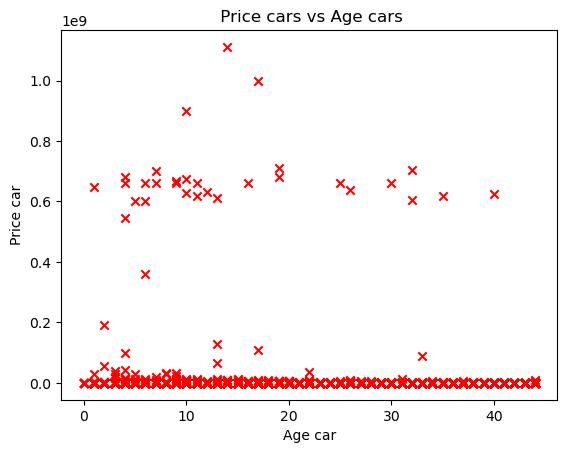

In [2964]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(data_scrapped['Age_vehicule'], data_scrapped['Prix'], marker='x', c='r') 

# Set the title
plt.title(" Price cars vs Age cars")
# Set the y-axis label
plt.ylabel('Price car')
# Set the x-axis label
plt.xlabel('Age car')
plt.show()

# Remove the outliers

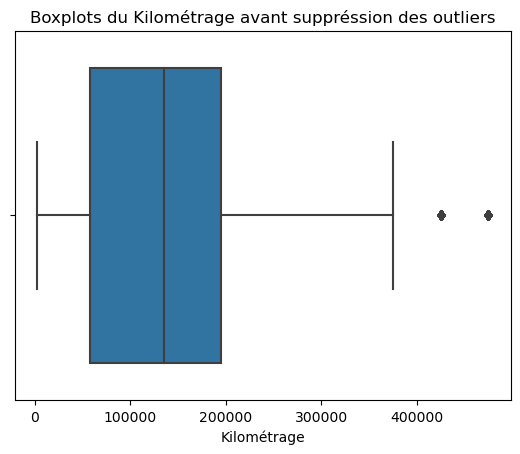

In [2965]:
import seaborn as sns
import matplotlib.pyplot as plt
#show the boxplot for Prix
sns.boxplot(x=data_scrapped['Kilométrage'])
plt.title("Boxplots du Kilométrage avant suppréssion des outliers")

plt.show()

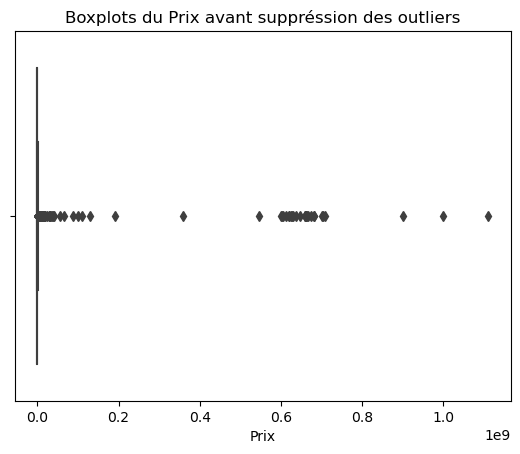

In [2966]:
import seaborn as sns
import matplotlib.pyplot as plt
#show the boxplot for Prix
sns.boxplot(x=data_scrapped['Prix'])
plt.title("Boxplots du Prix avant suppréssion des outliers")

plt.show()

In [2967]:
#show how much outliers we have in Kilometrage
Q1 = data_scrapped['Kilométrage'].quantile(0.25)
Q3 = data_scrapped['Kilométrage'].quantile(0.75)
IQR = Q3 - Q1
lower_km = Q1 - 1.5 * IQR
upper_km = Q3 + 1.5 * IQR
data_scrapped[(data_scrapped['Kilométrage'] < lower_km) | (data_scrapped['Kilométrage'] > upper_km)]['Kilométrage'].shape


(781,)

In [2968]:
#show how much outliers we have in Prix

Q1 = data_scrapped['Prix'].quantile(0.25)
Q3 = data_scrapped['Prix'].quantile(0.75)
IQR = Q3 - Q1
lower_prix = Q1 - 1.5 * IQR
upper_prix = Q3 + 1.5 * IQR
data_scrapped[(data_scrapped['Prix'] < lower_prix) | (data_scrapped['Prix'] > upper_prix)]['Prix'].shape

(3699,)

In [2969]:
#drop the outliers
data_scrapped = data_scrapped[
    (data_scrapped['Prix'] >= lower_prix) & (data_scrapped['Prix'] <= upper_prix) &
    (data_scrapped['Kilométrage'] >= lower_km) & (data_scrapped['Kilométrage'] <= upper_km)
]

In [2970]:
data_scrapped= data_scrapped.reset_index(drop=True)

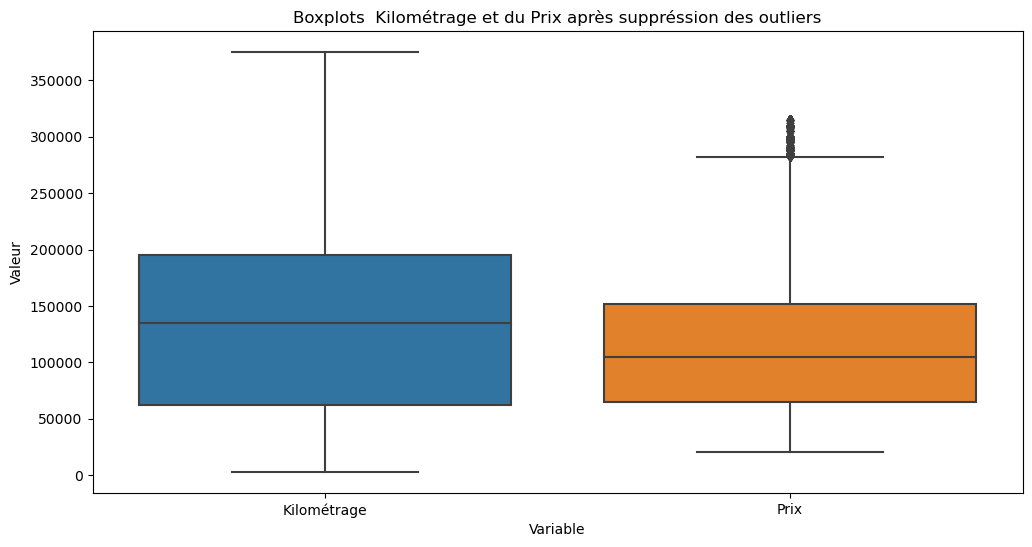

In [2971]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# On met les deux colonnes dans un DataFrame "long" pour seaborn
df_long = data_scrapped[['Kilométrage', 'Prix']].melt(var_name='Variable', value_name='Valeur')

sns.boxplot(x='Variable', y='Valeur', data=df_long)
plt.title("Boxplots  Kilométrage et du Prix après suppréssion des outliers")
plt.show()


In [2972]:
data_scrapped.duplicated().sum()

0

# Save our file cleaned

In [2973]:
#save the file
data_scrapped.to_csv('../../data/scrapped/voitures_clean.csv',index=False)

In [2974]:
data_scrapped.head()

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,Prix,Ville_grouped,Age_vehicule
0,Temara,Fiat,Punto,2007,224999.5,Diesel,5.0,Manuelle,5.0,WW au Maroc,Non,60000.0,Temara,18
1,Casablanca,Volkswagen,Touareg,2005,2499.5,Diesel,10.0,Automatique,5.0,WW au Maroc,Oui,90000.0,Casablanca,20
2,Dakhla,Toyota,Prado,2007,224999.5,Diesel,12.0,Manuelle,5.0,WW au Maroc,Non,97000.0,Autres,18
3,Khouribga,Volkswagen,Tiguan,2014,184999.5,Diesel,8.0,Automatique,5.0,Dédouanée,Non,255000.0,Autres,11
4,Meknès,Peugeot,308,2009,224999.5,Diesel,6.0,Manuelle,5.0,WW au Maroc,Non,85000.0,Meknès,16


In [2975]:
data_scrapped['Ville_grouped'].unique()

array(['Temara', 'Casablanca', 'Autres', 'Meknès', 'Mohammedia', 'Tanger',
       'Rabat', 'Marrakech', 'Tétouan', 'El Jadida', 'Kénitra', 'Fès',
       'Agadir', 'Salé', 'Oujda', 'Safi', 'Béni Mellal', 'Nador'],
      dtype=object)